In [2]:
import requests
res = requests.get('https://www.boxofficemojo.com/movies/?page=daily&view=chart&id=marvel2019.htm')

In [3]:
res

<Response [200]>

In [4]:
from bs4 import BeautifulSoup
#read out html test
soup = BeautifulSoup(res.text, 'html5lib')

In [ ]:
from datetime import datetime  
from datetime import timedelta

In [5]:
import pandas as pd
#use soup.select_one('table.chart-wide') to select table content only
#use pd.read_html to read the html into pandas (make the content readable)
dfs = pd.read_html(soup.select_one('table.chart-wide').prettify())

In [314]:
#take a look of the data
dfs[0].head()

,Day,Date,Rank,Gross,% +/- YD / LW*,% +/- YD / LW*,Theaters / Avg,Theaters / Avg,Gross-to-Date,Day #
0,Day,Date,Rank,Gross,% +/- YD / LW*,Theaters / Avg,Gross-to-Date,Day #,NaN,NaN
1,Fri,"Apr. 26, 2019",1,"$157,461,641",-,-,4662,"$33,776","$157,461,641",1.0
2,Sat,"Apr. 27, 2019",1,"$109,264,122",-30.6%,-,4662,"$23,437","$266,725,763",2.0
3,Sun,"Apr. 28, 2019",1,"$90,389,244",-17.3%,-,4662,"$19,389","$357,115,007",3.0
4,Mon,"Apr. 29, 2019",1,"$36,874,439",-59.2%,-,4662,"$7,910","$393,989,446",4.0


In [7]:
col = dfs[0].iloc[0]
col[5:] = col[4:9]
col[7:] = col[6:9]
col

/Users/jaehuang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/jaehuang/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:789: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_with(key, value)
/Users/jaehuang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0                 Day
1                Date
2                Rank
3               Gross
4    % +/- YD  /  LW*
5    % +/- YD  /  LW*
6    Theaters  /  Avg
7    Theaters  /  Avg
8       Gross-to-Date
9               Day #
Name: 0, dtype: object

In [46]:
df = dfs[0]
df.columns = col
df = df.drop(0,axis=0)
df.head()

,Day,Date,Rank,Gross,% +/- YD / LW*,% +/- YD / LW*,Theaters / Avg,Theaters / Avg,Gross-to-Date,Day #
1,Fri,"Apr. 26, 2019",1,"$157,461,641",-,-,4662,"$33,776","$157,461,641",1.0
2,Sat,"Apr. 27, 2019",1,"$109,264,122",-30.6%,-,4662,"$23,437","$266,725,763",2.0
3,Sun,"Apr. 28, 2019",1,"$90,389,244",-17.3%,-,4662,"$19,389","$357,115,007",3.0
4,Mon,"Apr. 29, 2019",1,"$36,874,439",-59.2%,-,4662,"$7,910","$393,989,446",4.0
5,Tue,"Apr. 30, 2019",1,"$33,110,349",-10.2%,-,4662,"$7,102","$427,099,795",5.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 31
Data columns (total 10 columns):
Day                 31 non-null object
Date                31 non-null object
Rank                31 non-null object
Gross               31 non-null object
% +/- YD  /  LW*    31 non-null object
% +/- YD  /  LW*    31 non-null object
Theaters  /  Avg    31 non-null object
Theaters  /  Avg    31 non-null object
Gross-to-Date       31 non-null object
Day #               31 non-null float64
dtypes: float64(1), object(9)
memory usage: 2.7+ KB


## Clean the data for time series format

In [47]:
df['Date'] = pd.to_datetime(df['Date']) #convert date from string to datetime
df['Gross'] = df['Gross'].str.replace('$','')
df['Gross'] = df['Gross'].str.replace(',','') #remove dollar sign and comma in Gross 
df['Gross'] = df['Gross'].astype(int) #convert Gross into int
df.head()

,Day,Date,Rank,Gross,% +/- YD / LW*,% +/- YD / LW*,Theaters / Avg,Theaters / Avg,Gross-to-Date,Day #
1,Fri,2019-04-26,1,157461641,-,-,4662,"$33,776","$157,461,641",1.0
2,Sat,2019-04-27,1,109264122,-30.6%,-,4662,"$23,437","$266,725,763",2.0
3,Sun,2019-04-28,1,90389244,-17.3%,-,4662,"$19,389","$357,115,007",3.0
4,Mon,2019-04-29,1,36874439,-59.2%,-,4662,"$7,910","$393,989,446",4.0
5,Tue,2019-04-30,1,33110349,-10.2%,-,4662,"$7,102","$427,099,795",5.0


In [48]:
ts = df[['Date','Gross']]
ts = ts.set_index('Date')
ts.head()

,Gross
Date,
2019-04-26,157461641
2019-04-27,109264122
2019-04-28,90389244
2019-04-29,36874439
2019-04-30,33110349


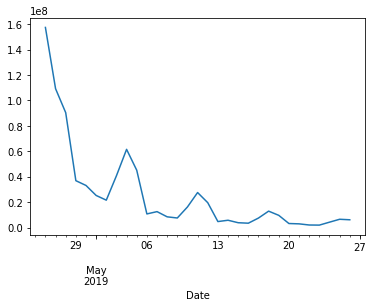

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
ts['Gross'].plot()

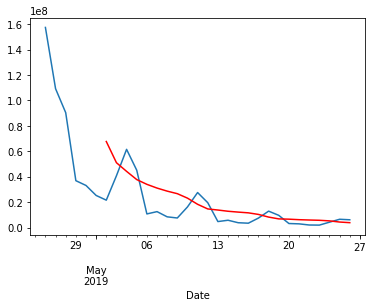

In [15]:
moving_avg = ts['Gross'].rolling(window=7).mean()
ts['Gross'].plot()
moving_avg.plot(color='r')

In [16]:
import statsmodels.api as sm

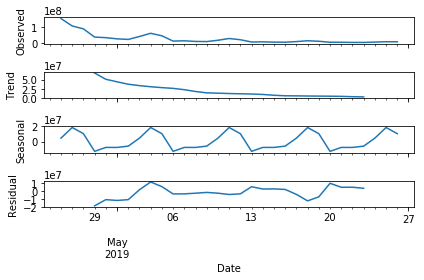

In [253]:
# since the date is linear decreasing, I use additive model
decomposition = sm.tsa.seasonal_decompose(ts, model='additive') 
plt.figure(figsize=(10,10))
decomposition.plot()
plt.show()

# Use ARIMA model to do the analysis
ARIMA(p,d,q)<br>
p: associated with the auto-regressive aspect of the model<br>
d: effects the amount of differencing to apply to a time series<br>
q: associated with the moving average part of the model

In [1]:
from pyramid.arima import auto_arima

In [218]:
# stepwise_model = auto_arima(ts, start_p=1, start_q=0,
#                            max_p=3, max_q=2, 
#                            start_P=0, seasonal=True,
#                            d=1, max_d=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True)

stepwise_model = auto_arima(ts, start_p=1, start_q=2,
                           max_p=7, max_q=7, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1,max_d=2, trace=True, 
                           error_action='ignore',  
                           suppress_warnings=True,
                           stepwise=True)

# stepwise_model = auto_arima(ts, start_p=1, start_q=0,
#                            max_p=3, max_q=2, m=7,
#                            start_P=0, seasonal=True,
#                            d=1, D=2, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)

print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=830.578, BIC=832.849, Fit time=0.016 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=824.287, BIC=828.829, Fit time=0.096 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=822.294, BIC=825.700, Fit time=0.051 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 7); AIC=824.541, BIC=830.218, Fit time=0.156 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=822.988, BIC=827.530, Fit time=0.062 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=800.261, BIC=804.803, Fit time=0.107 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 0, 7); AIC=nan, BIC=nan, Fit time=na

In [255]:
#use first 20 rows for training
train_ts = ts.iloc[:20]
test_ts = ts.iloc[20:]
stepwise_model.fit(train_ts)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 0, 7), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [256]:
# predict on the last 11 rows
pred = stepwise_model.predict(n_periods=11)
print(pred)

[ 6089525.17852499 18133123.4604844  32871949.62403084 28287528.37382939
 16814077.08905293 21246233.75146125 22683285.3143513  28376441.02413691
 43811691.32959083 61942169.59825711 60749400.46671113]


In [197]:
# examine the start and the end date of the prediction
# use ts.index[-1] to make sure the prediction start from the date of the end of ts data
print(ts.index[-1] + timedelta(days=1))

# use ts.index[-1] + length of prediction to make sure the prediction end date matches the prediction length
print(ts.index[-1]+ timedelta(days=len(pred)))

# create the list for the prediction dates
pred_date = [ts.index[-1] + timedelta(days=x) for x in range(1,len(pred)+1)]
pred_date = [d.strftime('%Y-%m-%d') for d in pred_date]

2019-05-27 00:00:00
2019-06-15 00:00:00


In [246]:
future_prediction = pd.DataFrame(pred, index=ts.index[20:],columns=['Predict Gross'])
future_prediction

,Predict Gross
Date,
2019-05-16,6.089525e+06
2019-05-17,1.813312e+07
2019-05-18,3.287195e+07
2019-05-19,2.828753e+07
2019-05-20,1.681408e+07
2019-05-21,2.124623e+07
2019-05-22,2.268329e+07
2019-05-23,2.837644e+07
2019-05-24,4.381169e+07


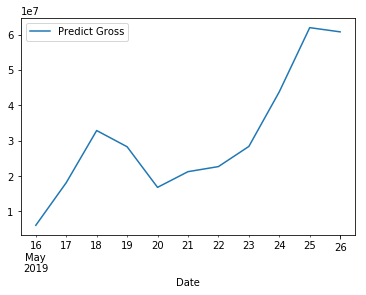

In [247]:
plt.figure(figsize=(10,6))
future_prediction.plot()

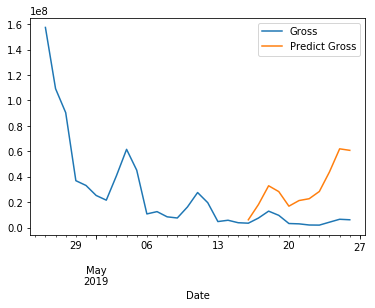

In [252]:
plt.figure(figsize=(10,6))

pd.concat([ts,future_prediction],axis=1).plot()

# The other approach
set parameter directly

In [279]:
model = sm.tsa.statespace.SARIMAX(train_ts,
                                order=(1, 2, 1),
                                seasonal_order=(1, 1, 1, 1),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2296      0.242      0.947      0.344      -0.246       0.705
ma.L1         -0.9275      0.349     -2.658      0.008      -1.611      -0.244
ar.S.L1        0.2296      0.242      0.947      0.344      -0.246       0.705
ma.S.L1       -0.9275      0.349     -2.658      0.008      -1.611      -0.244
sigma2      4.272e+14   1.15e-15   3.71e+29      0.000    4.27e+14    4.27e+14


/Users/jaehuang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


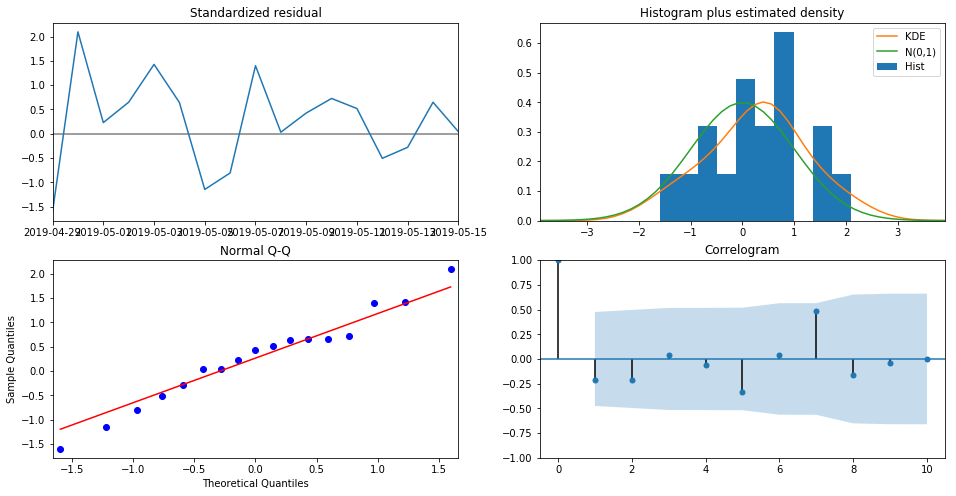

In [274]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [275]:
start_d = ts.index[-1] + timedelta(days=1)
end_d = ts.index[-1]+ timedelta(days=20)
pred = results.get_prediction(start=test_ts.index[0], end=test_ts.index[-1], dynamic=False)
pred.conf_int()

,lower Gross,upper Gross
2019-05-16,-4.316353e+07,4.011650e+07
2019-05-17,-8.912999e+07,7.188353e+07
2019-05-18,-1.357873e+08,1.022437e+08
2019-05-19,-1.834722e+08,1.320470e+08
2019-05-20,-2.329118e+08,1.621787e+08
2019-05-21,-2.846620e+08,1.932399e+08
2019-05-22,-3.390866e+08,2.256070e+08
2019-05-23,-3.964195e+08,2.595173e+08
2019-05-24,-4.568152e+08,2.951261e+08
2019-05-25,-5.203799e+08,3.325399e+08


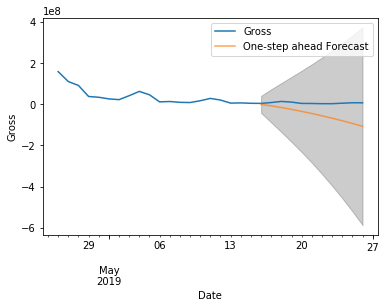

In [276]:
pred_ci = pred.conf_int()
plt.figure(figsize=(14,7))
ax = ts.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Gross')
plt.legend()

# Exponential smoothing
https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1

In [288]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

/Users/jaehuang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


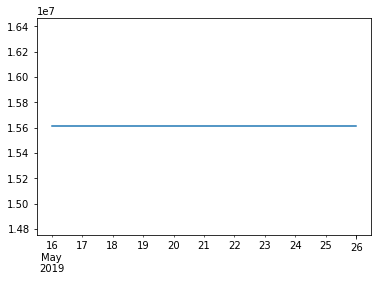

In [286]:

fit1 = SimpleExpSmoothing(train_ts).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(11)
fcast1.plot()

/Users/jaehuang/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/jaehuang/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/Users/jaehuang/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/Users/jaehuang/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/Users/jaehuang/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/jaehuang/anaconda3/lib/python3.

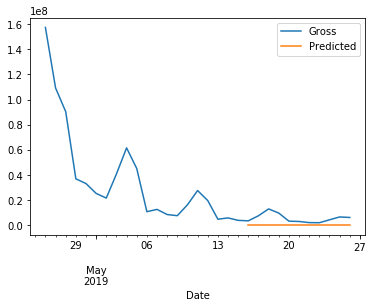

In [313]:
fit1 = ExponentialSmoothing(train_ts, seasonal_periods=7, 
                            trend='add', seasonal='add').fit(use_boxcox=True)
plt.figure(figsize=(14,7))
ts.plot(label='Observed')
fit1.forecast(11).plot(label='Predicted')

plt.legend()

In [308]:
fit1.fittedfcast

array([49.32183368, 49.32183368, 49.32183368, 49.32183368, 49.32183368,
       49.32183368, 49.32183368, 49.32183368, 49.32183368, 49.32183368,
       49.32183368, 49.32183368, 49.32183368, 49.32183368, 49.32183368,
       49.32183368, 49.32183368, 49.32183368, 49.32183368, 49.32183368,
       49.32183368])

In [309]:
fit1.fittedvalues

Date
2019-04-26    49.321834
2019-04-27    49.321834
2019-04-28    49.321834
2019-04-29    49.321834
2019-04-30    49.321834
2019-05-01    49.321834
2019-05-02    49.321834
2019-05-03    49.321834
2019-05-04    49.321834
2019-05-05    49.321834
2019-05-06    49.321834
2019-05-07    49.321834
2019-05-08    49.321834
2019-05-09    49.321834
2019-05-10    49.321834
2019-05-11    49.321834
2019-05-12    49.321834
2019-05-13    49.321834
2019-05-14    49.321834
2019-05-15    49.321834
dtype: float64